In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("datascience.csv",encoding="utf-8")
df2 = pd.read_csv("machinelearning.csv",encoding="utf-8")


df = pd.concat([df1,df2], axis=0).drop_duplicates()
df.shape

(1048, 5)

In [3]:
print(df)

                                                 Title   Location  \
0                                         Data Analyst  Bengaluru   
1                                     Sr. Data Analyst  Bengaluru   
2    Senior Software Development Engineer in Test (...  Bengaluru   
3                                      Sr Data Analyst  Bengaluru   
4                                        Lead Engineer  Bengaluru   
5                                      Sr. Manager DSA  Bengaluru   
6                                    Sr Data Scientist  Bengaluru   
7                                             Engineer  Bengaluru   
8                              Data Science Researcher  Bengaluru   
9                                 Data Science Analyst  Bengaluru   
10                                        Data Analyst    Gurgaon   
11                        Data Science (Jupyter/Azure      Mumbai   
12                             Data Science Specialist  Bengaluru   
13                                

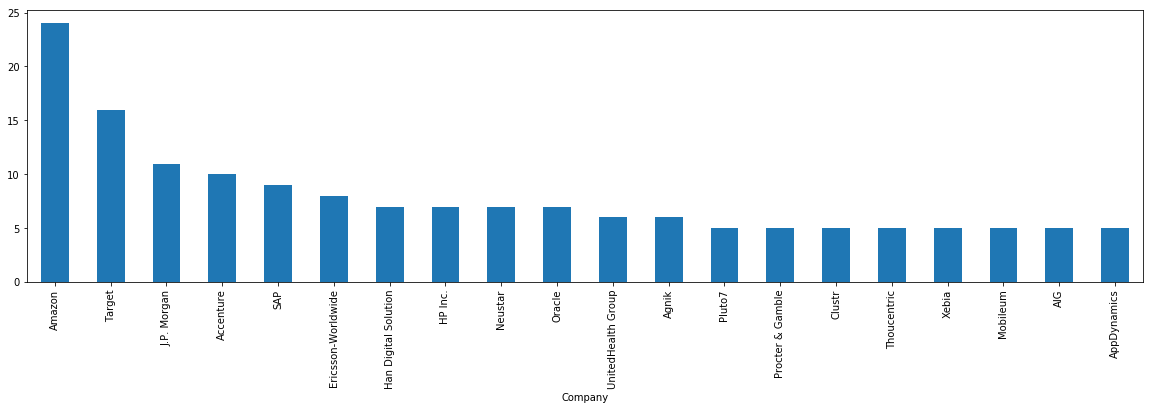

In [4]:
#companies with top 20 highest number of job listings
counts = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
counts.plot("bar",figsize=(20,5))

In [5]:
#Locations with top 10 highest number of job listings
loc_counts = df.groupby("Location").count()["Title"].sort_values(ascending=False)[:10]
loc_counts

Location
Bengaluru    384
Pune         111
Gurgaon      101
Hyderabad     96
Mumbai        74
Chennai       51
Noida         44
New Delhi     41
India         28
Ahmedabad     21
Name: Title, dtype: int64

In [6]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [7]:
import nltk
from nltk import word_tokenize

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tags_df = df["Description"].apply(cleanData)

In [8]:
from collections import Counter
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

In [9]:
skills = ["experienced","expert","intern","intermediate","beginner","fresher"]
#skills = ["aws","azure"]
#skills = ["nltk","pandas","numpy","matplotlib","jupyter","opencv"]
#skills = ["statistics","machine","deep","neural","predictive"]

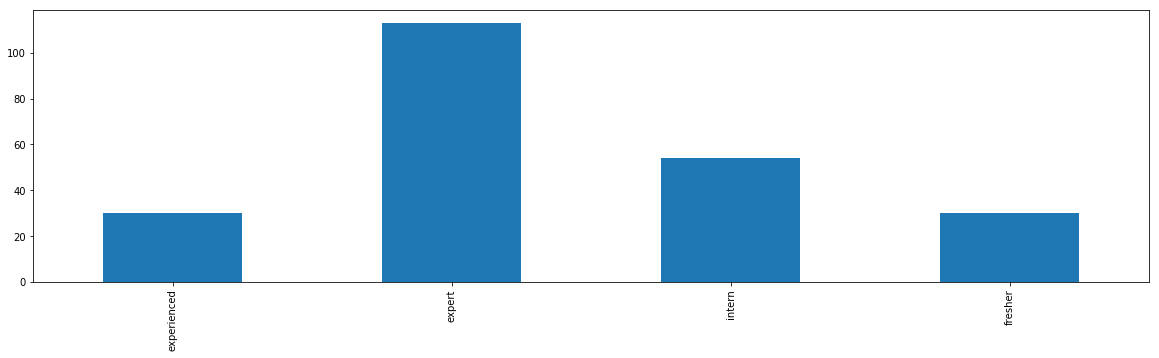

In [10]:
filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))